In [2]:
import os
import sys
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, minmax_scale
from datetime import datetime
import tensorflow as tf

sys.path.append('../../library/')

from data import load_scaled_datasets, load_raw_datasets, calc_z_bins
from models import Conv2DNeuralNetwork


In [2]:
# model_path = "/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_10/"
model_path = "/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/"
models = [x[0] for x in os.walk(model_path)][1:]
models

['/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/7',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/6',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/3',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/11',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/19',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/14',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/17',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/5',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/2',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/4',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/1',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/13',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/16',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/20',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/9',
 '/glade/p/cisl/aiml/ggantos/holo

In [4]:
path_data = "/glade/p/cisl/aiml/ai4ess_hackathon/holodec/"
num_particles = "large"
output_cols = ["z", "hid"]
scaler_out = MinMaxScaler()
subset = 0.25
num_z_bins = 10
mass = False

valid_index = 11



In [5]:
train_inputs_raw, train_outputs_raw = load_raw_datasets(path_data,
                                                        num_particles, 
                                                        "train",
                                                        output_cols,
                                                        subset)

valid_inputs_raw, valid_outputs_raw = load_raw_datasets(path_data,
                                                        num_particles, 
                                                        "valid",
                                                        output_cols,
                                                        subset)


In [ ]:
train_inputs,\
train_outputs,\
valid_inputs,\
valid_outputs = load_scaled_datasets(path_data,
                                     num_particles,
                                     output_cols,
                                     scaler_out,
                                     subset,
                                     10,
                                     mass)

z_bins = calc_z_bins(train_outputs_raw, valid_outputs_raw, 10)
bin_size = z_bins[1] - z_bins[0]


In [7]:
def ranked_probability_score(y_true, y_pred):
    return np.mean((np.cumsum(y_true, axis=1) - np.cumsum(y_pred, axis=1)) ** 2) / (y_true.shape[1] -1)

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_10/7
0.010148084201578906 0.010577728429470537
RPSS: 0.041
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_10/6
0.008114461063402755 0.010577728429470537
RPSS: 0.233
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_10/3
0.003948908744471499 0.010577728429470537
RPSS: 0.627
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_10/11
0.010150679409273028 0.010577728429470537
RPSS: 0.040
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_10/19
0.00609409860180165 0.010577728429470537
RPSS: 0.424
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_10/14
0.01015349492703315 0.010577728429470537
RPSS: 0.040
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_10/17
0.007463520367762123 0.010577728429470537
RPSS: 0.294
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_10/5
0.010145660758717888 0.010577728429470537
RPSS: 0.041
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_10/2
0.010027415225096172 0.010577728429470537
RPSS: 0.052
/glade/p/cisl/aiml/ggantos/holodec/

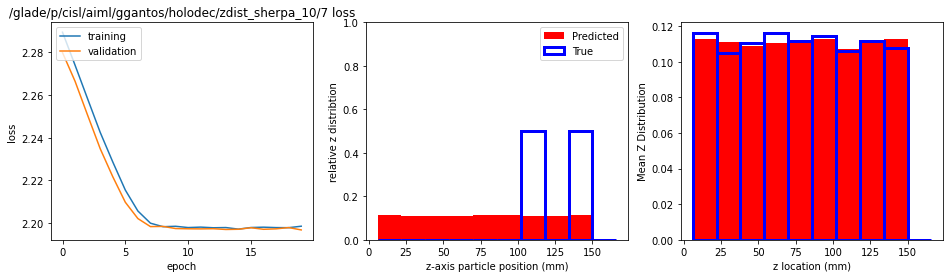

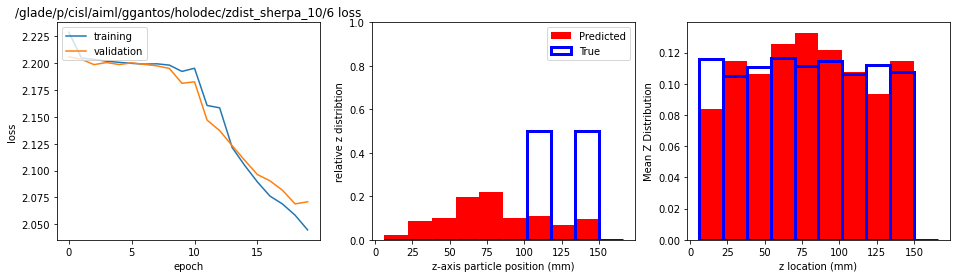

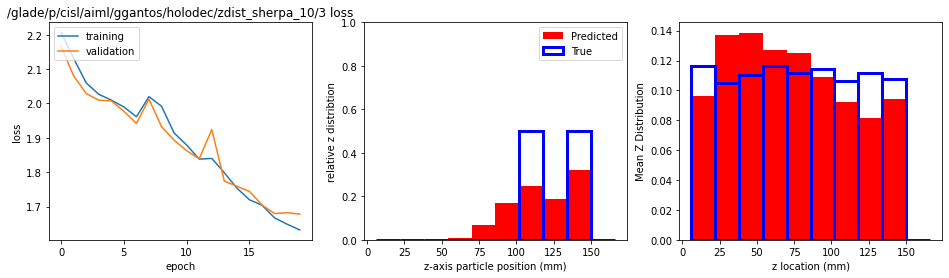

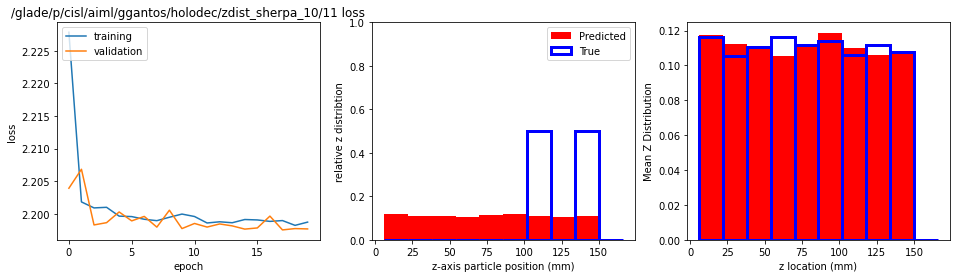

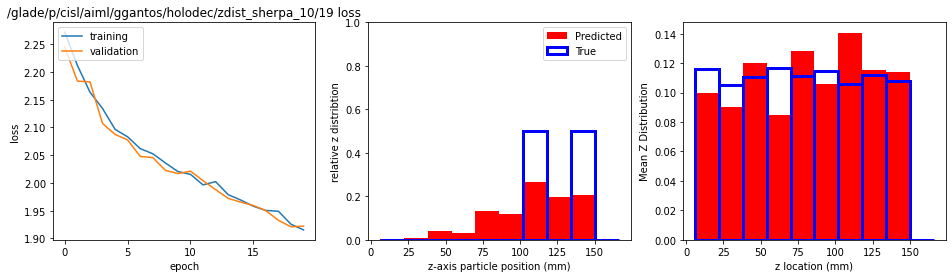

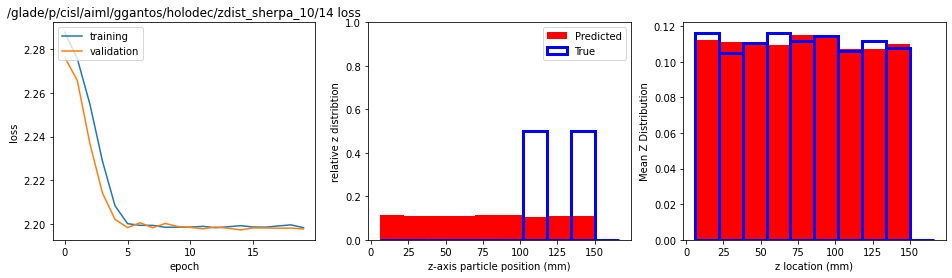

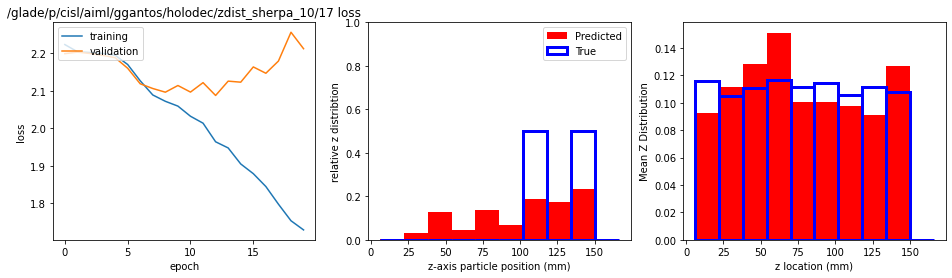

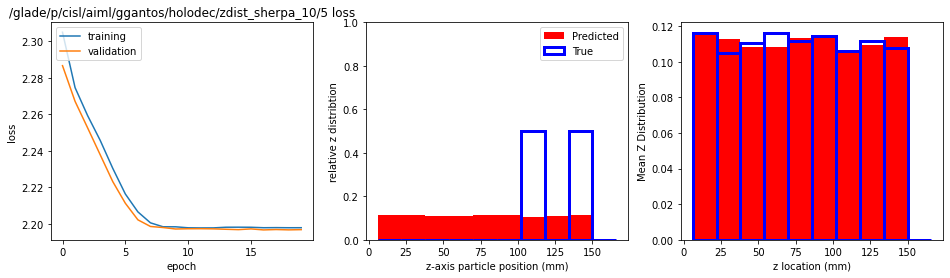

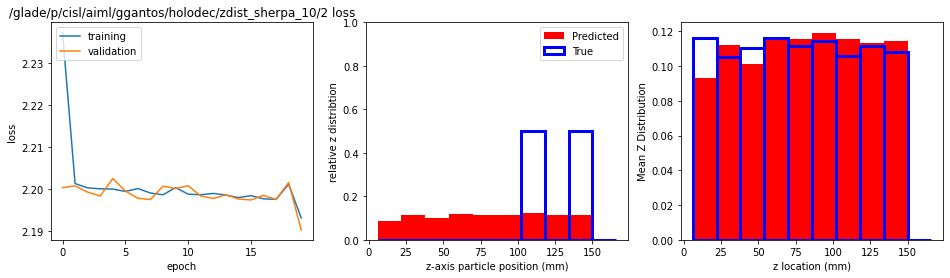

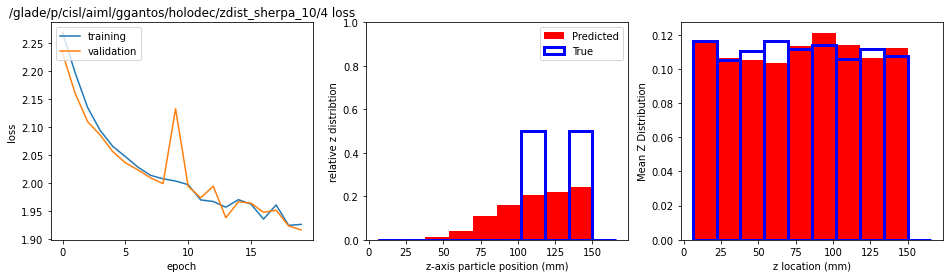

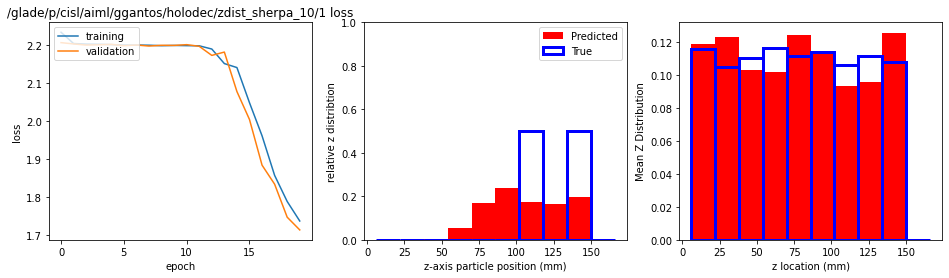

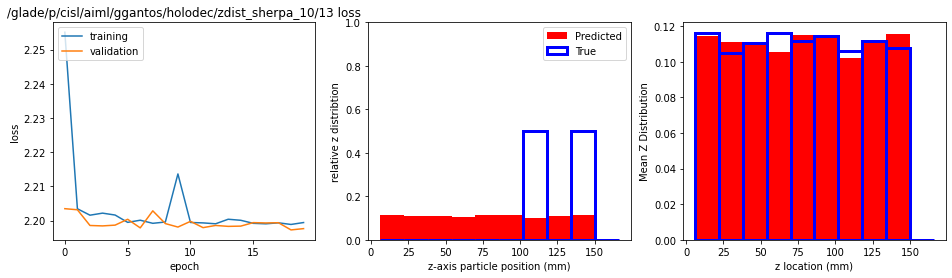

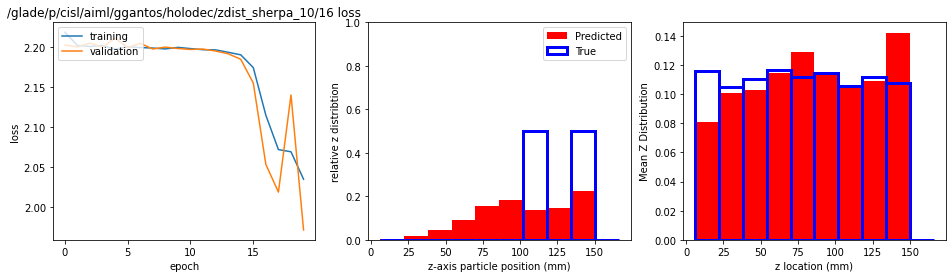

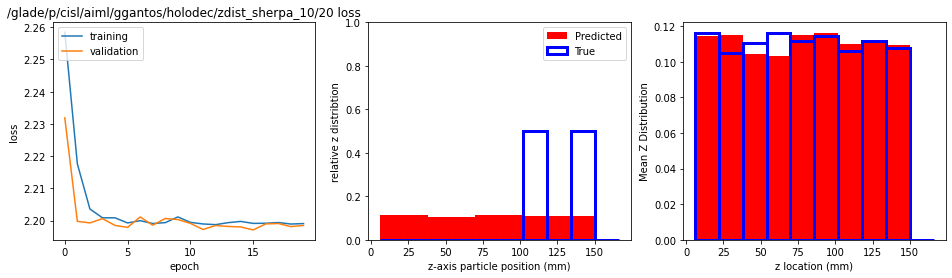

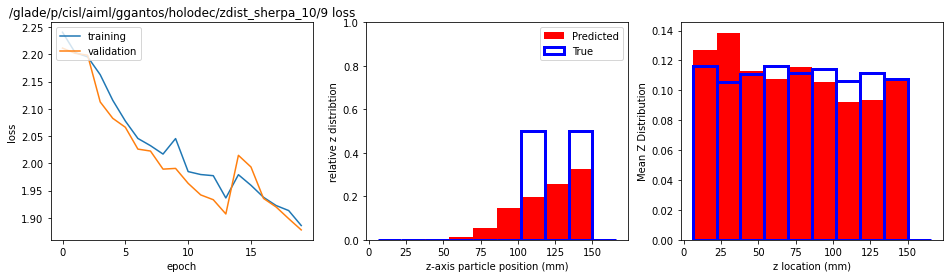

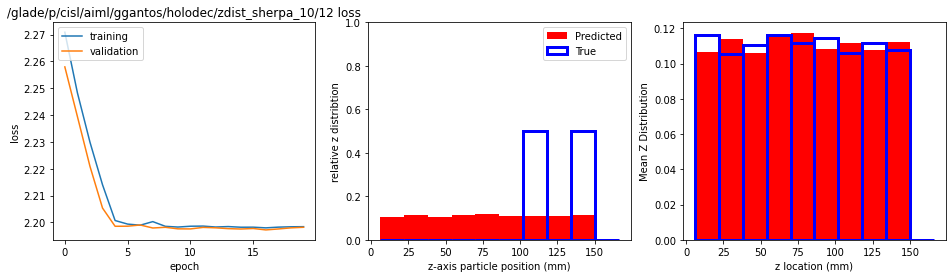

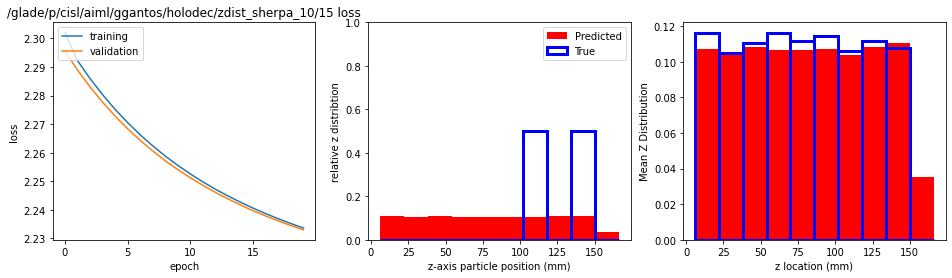

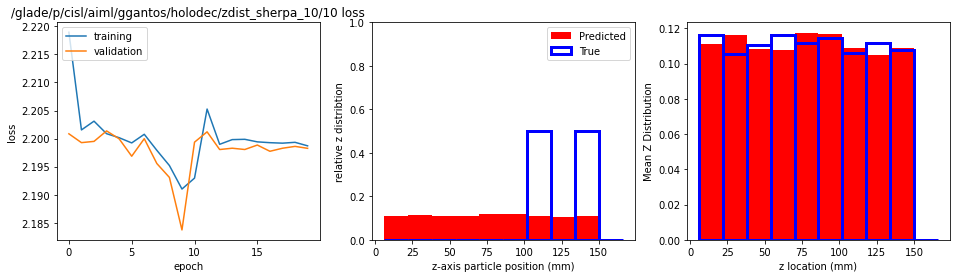

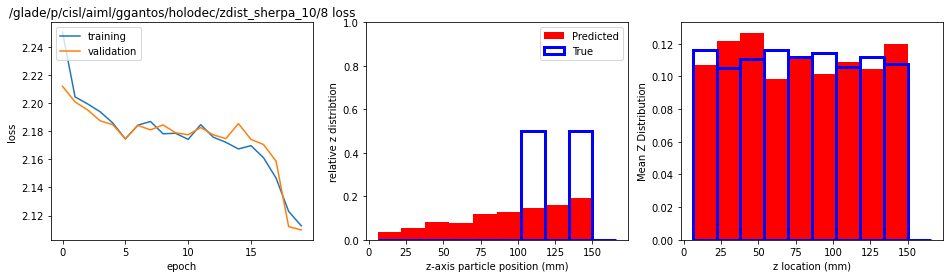

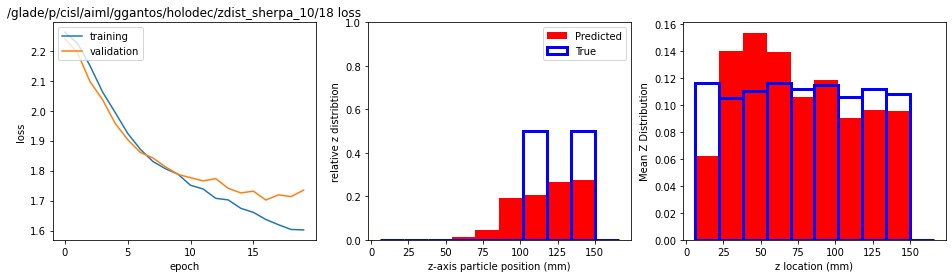

In [36]:
for model in models:
    print(model)
    train_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "train_outputs_pred.csv"))
    valid_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "valid_outputs_pred.csv"))
    
    loss = np.genfromtxt(os.path.join(model_path, model, "loss.csv"))
    val_loss = np.genfromtxt(os.path.join(model_path, model, "val_loss.csv"))
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    axes[0].plot(loss)
    axes[0].plot(val_loss)
    axes[0].set_title(f'{model} loss')
    axes[0].set_ylabel('loss')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='upper left')
    
    axes[1].bar(z_bins / 1000, valid_outputs_pred[valid_index], bin_size / 1000, color='red', label="Predicted")
    axes[1].bar(z_bins / 1000, valid_outputs[valid_index], bin_size / 1000, edgecolor='blue', facecolor="none", lw=3, label="True")
    axes[1].set_ylim(0, 1)
    axes[1].set_xlabel("z-axis particle position (mm)")
    axes[1].set_ylabel("relative z distribtion")
    axes[1].legend(loc="best")
    
    axes[2].bar(z_bins / 1000, valid_outputs_pred.mean(axis=0), (z_bins[1] - z_bins[0]) / 1000, color='red')
    axes[2].bar(z_bins / 1000, valid_outputs.mean(axis=0), (z_bins[1]-z_bins[0]) / 1000, edgecolor='blue', facecolor="none", lw=3)
    axes[2].set_xlabel("z location (mm)")
    axes[2].set_ylabel("Mean Z Distribution")
    
    rps_nn = ranked_probability_score(valid_outputs, valid_outputs_pred)
    rps_climo = ranked_probability_score(valid_outputs, np.ones(valid_outputs_pred.shape) / valid_outputs_pred.shape[1])
    print(rps_nn, rps_climo)
    rpss = 1 - rps_nn / rps_climo
    print(f"RPSS: {rpss:0.3f}")

In [20]:
model_path_100 = "/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/"
models_100 = [x[0] for x in os.walk(model_path_100)][1:]
models_100

['/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/7',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/6',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/3',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/11',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/19',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/14',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/17',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/5',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/2',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/4',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/1',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/13',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/16',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/20',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/9',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/12',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/15',
 '/gl

In [21]:
train_inputs_100,\
train_outputs_100,\
valid_inputs_100,\
valid_outputs_100 = load_scaled_datasets(path_data,
                                     num_particles,
                                     output_cols,
                                     scaler_out,
                                     subset,
                                     100,
                                     mass)

z_bins_100 = calc_z_bins(train_outputs_raw, valid_outputs_raw, 100)
bin_size_100 = z_bins_100[1] - z_bins_100[0]

In [1]:
y = yaml.load(open('/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_large_100/19/config.yml'), Loader=yaml.FullLoader)
y

NameError: name 'yaml' is not defined

In [8]:
mod = Conv2DNeuralNetwork(**y["conv2d_network"])
hist = mod.fit(train_inputs, train_outputs, valid_inputs, valid_outputs)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 600, 400, 1)]     0         
_________________________________________________________________
conv2D_00 (Conv2D)           (None, 600, 400, 2)       52        
_________________________________________________________________
maxpool2D_00 (MaxPooling2D)  (None, 300, 200, 2)       0         
_________________________________________________________________
conv2D_01 (Conv2D)           (None, 300, 200, 4)       204       
_________________________________________________________________
maxpool2D_01 (MaxPooling2D)  (None, 150, 100, 4)       0         
_________________________________________________________________
conv2D_02 (Conv2D)           (None, 150, 100, 6)       606       
_________________________________________________________________
maxpool2D_02 (MaxPooling2D)  (None, 75, 50, 6)         0   

KeyboardInterrupt: 

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/7
0.0010289352180417742 0.0010297441537896288
RPSS: 0.001


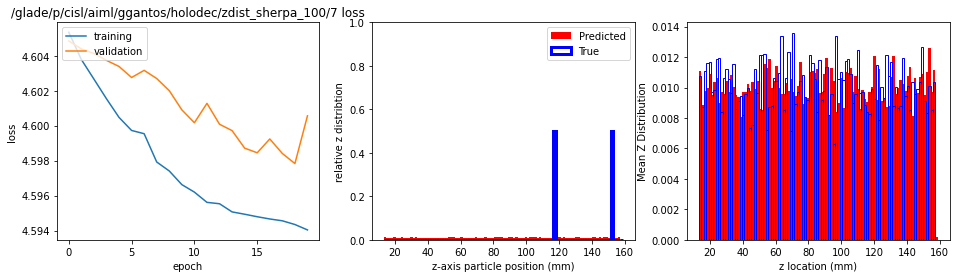

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/6
0.001029418022552111 0.0010297441537896288
RPSS: 0.000


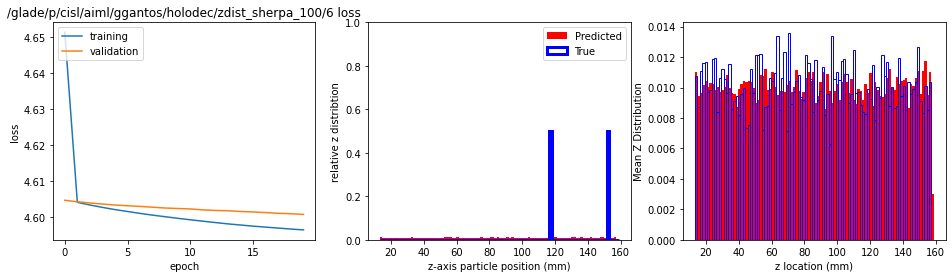

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/3
0.0004314111924710892 0.0010297441537896288
RPSS: 0.581


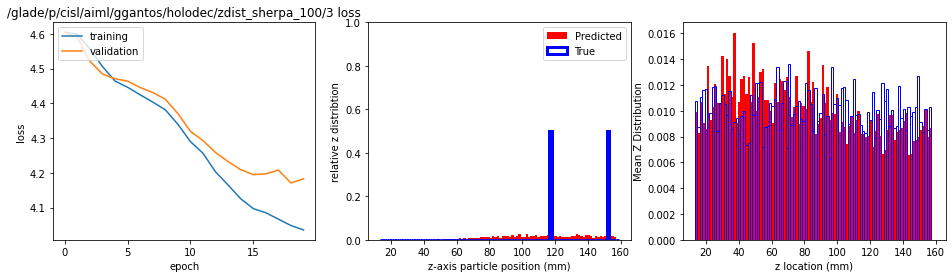

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/11
0.0006016580107610452 0.0010297441537896288
RPSS: 0.416


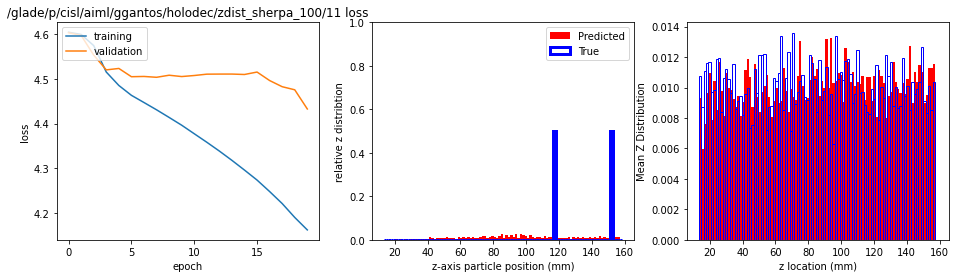

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/19
0.001029017792841819 0.0010297441537896288
RPSS: 0.001


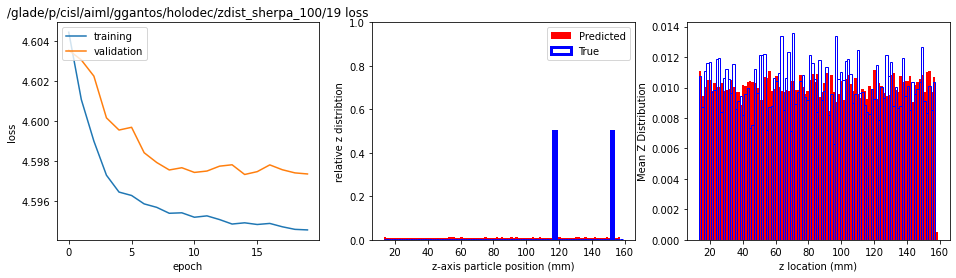

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/14
0.0010293552054731372 0.0010297441537896288
RPSS: 0.000


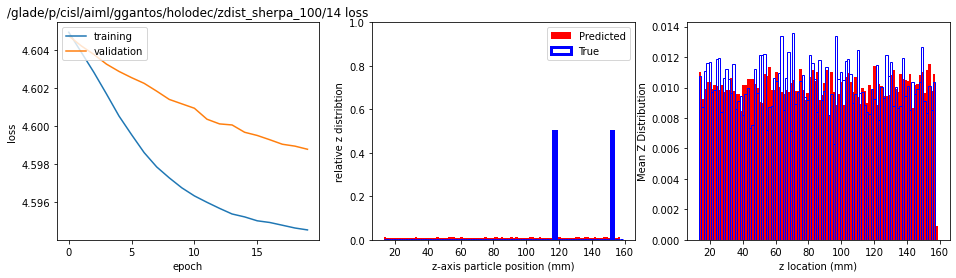

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/17
0.0010292540548521524 0.0010297441537896288
RPSS: 0.000


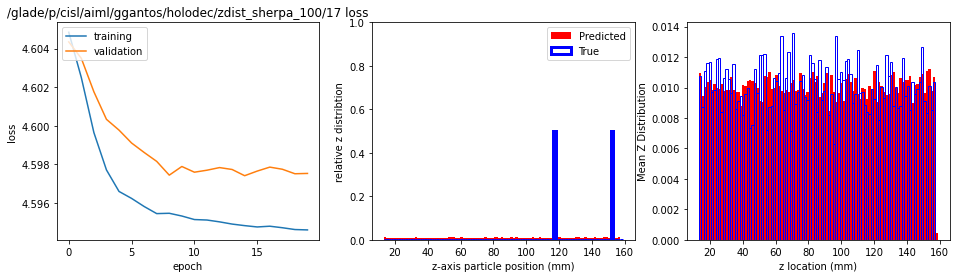

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/5
0.0010293015429115972 0.0010297441537896288
RPSS: 0.000


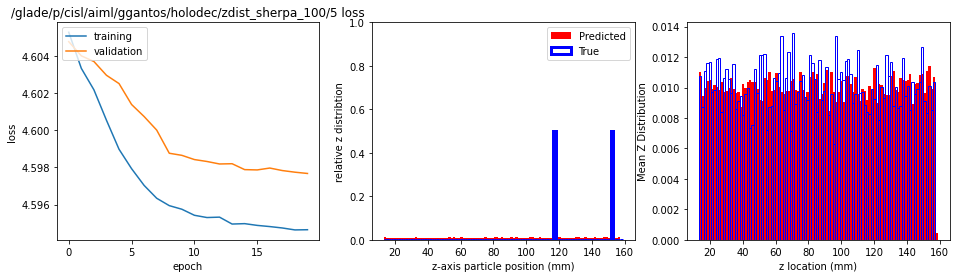

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/2
0.0010295892285246758 0.0010297441537896288
RPSS: 0.000


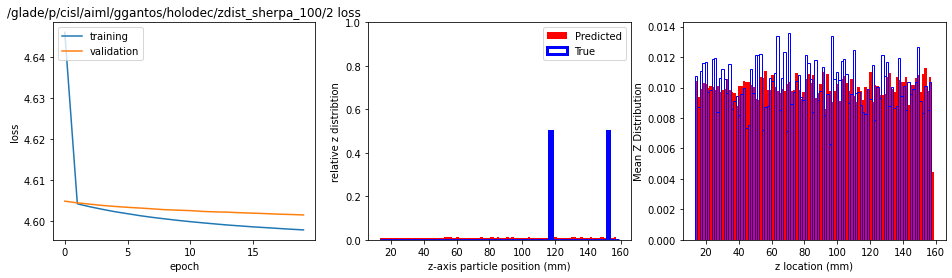

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/4
0.0010295686046979705 0.0010297441537896288
RPSS: 0.000


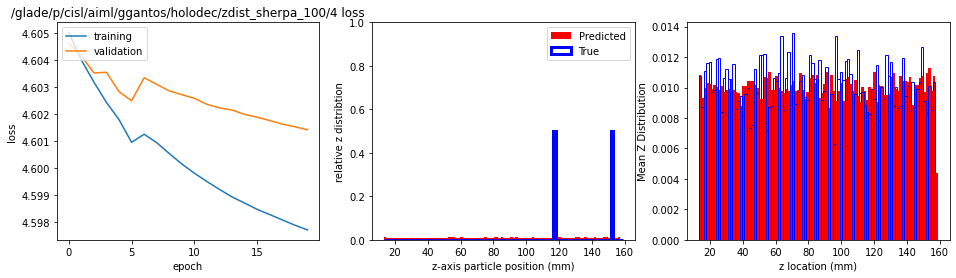

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/1
0.0010293976117520295 0.0010297441537896288
RPSS: 0.000


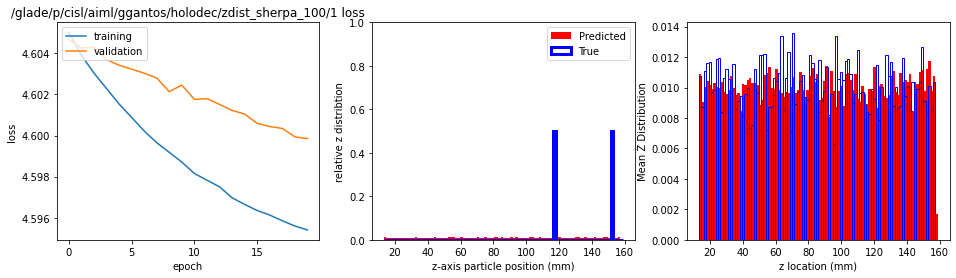

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/13
0.00044090361759075363 0.0010297441537896288
RPSS: 0.572


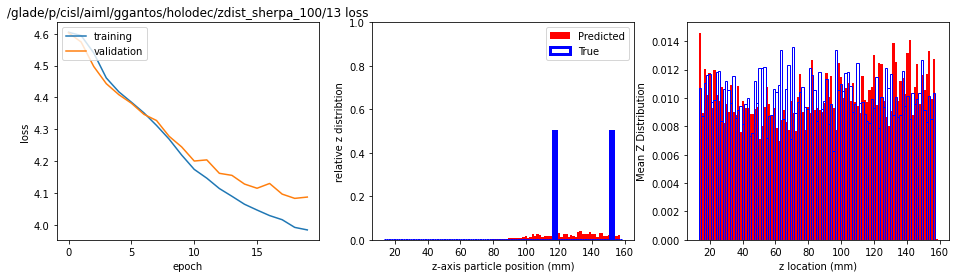

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/16
0.0003959931770389207 0.0010297441537896288
RPSS: 0.615


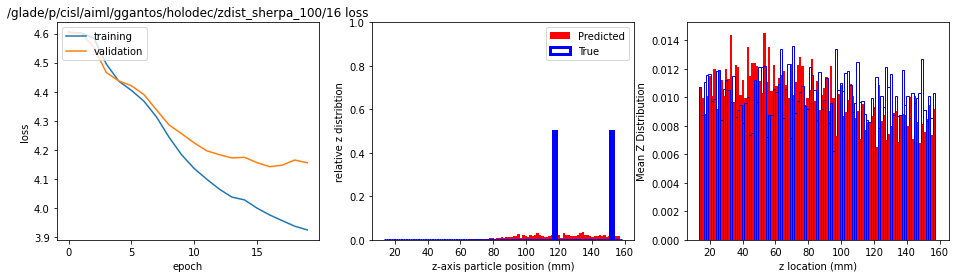

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/20
0.0010294720523965338 0.0010297441537896288
RPSS: 0.000


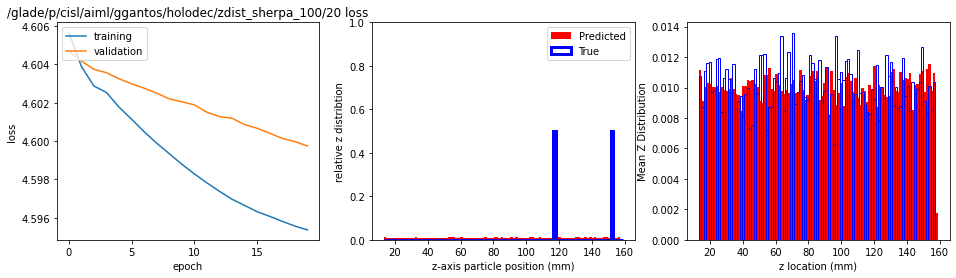

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/9
0.0005650232582896418 0.0010297441537896288
RPSS: 0.451


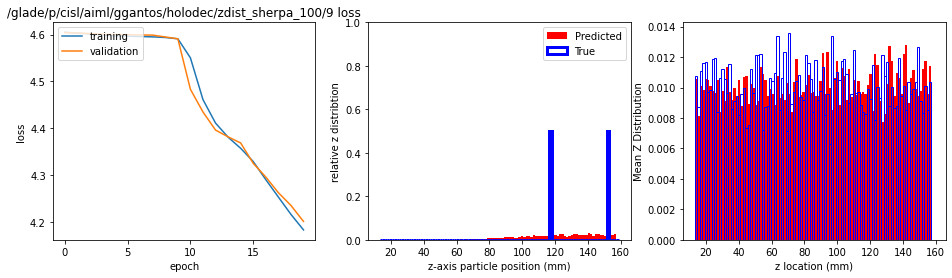

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/12
0.0005890143525945913 0.0010297441537896288
RPSS: 0.428


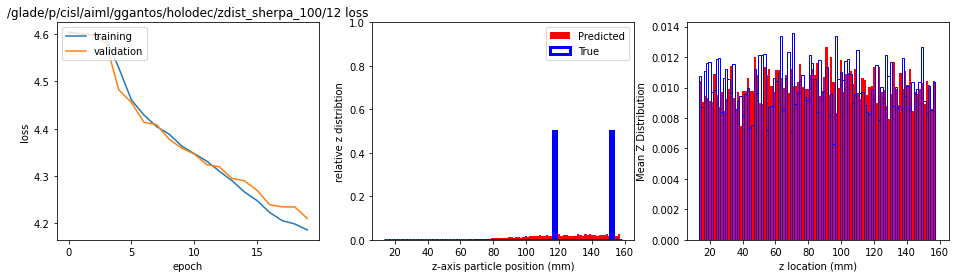

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/15
0.00041790642142471127 0.0010297441537896288
RPSS: 0.594


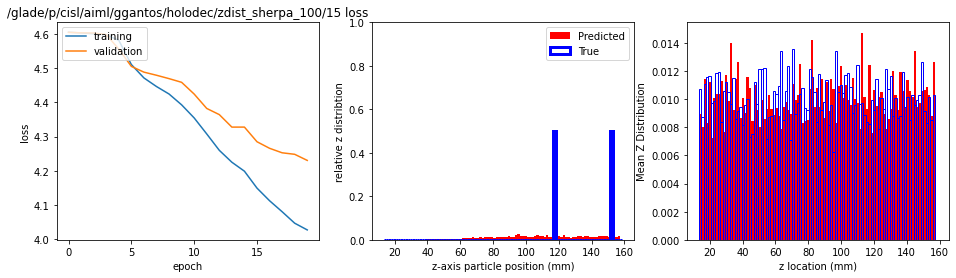

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/10
0.0004190524621916712 0.0010297441537896288
RPSS: 0.593


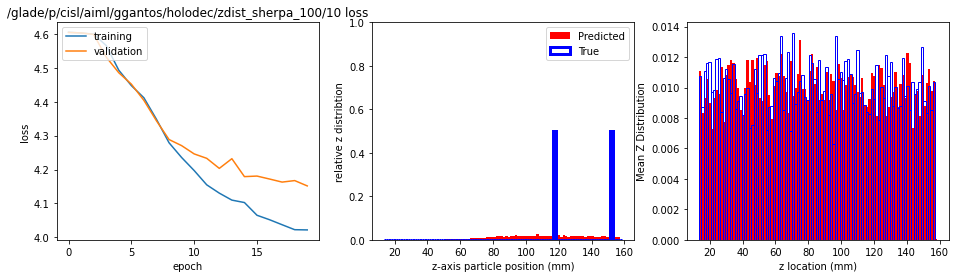

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/8
0.0007691937932420626 0.0010297441537896288
RPSS: 0.253


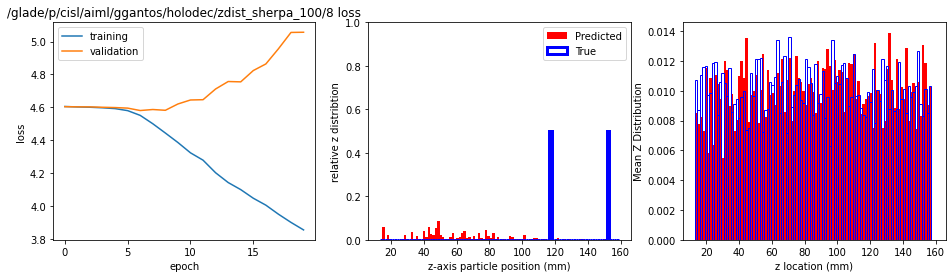

/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_100/18
0.0010292273429965016 0.0010297441537896288
RPSS: 0.001


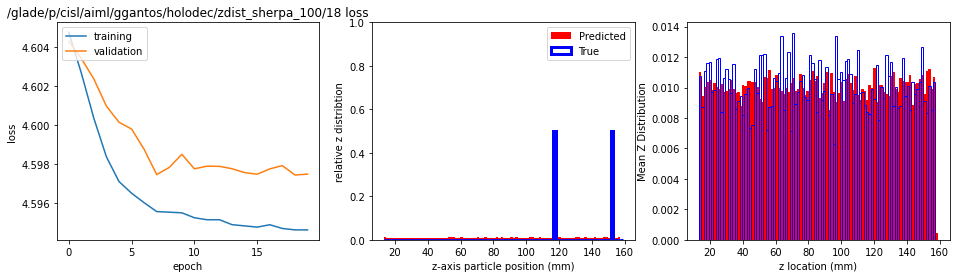

In [22]:
for model in models_100:
    print(model)
    train_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "train_outputs_pred.csv"))
    valid_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "valid_outputs_pred.csv"))
    
    loss = np.genfromtxt(os.path.join(model_path, model, "loss.csv"))
    val_loss = np.genfromtxt(os.path.join(model_path, model, "val_loss.csv"))
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    axes[0].plot(loss)
    axes[0].plot(val_loss)
    axes[0].set_title(f'{model} loss')
    axes[0].set_ylabel('loss')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='upper left')
    
    axes[1].bar(z_bins_100 / 1000, valid_outputs_pred[valid_index], bin_size_100 / 1000, color='red', label="Predicted")
    axes[1].bar(z_bins_100 / 1000, valid_outputs_100[valid_index], bin_size_100 / 1000, edgecolor='blue', facecolor="none", lw=3, label="True")
    axes[1].set_ylim(0, 1)
    axes[1].set_xlabel("z-axis particle position (mm)")
    axes[1].set_ylabel("relative z distribtion")
    axes[1].legend(loc="best")
    
    axes[2].bar(z_bins_100 / 1000, valid_outputs_pred.mean(axis=0), (z_bins_100[1] - z_bins_100[0]) / 1000, color='red')
    axes[2].bar(z_bins_100 / 1000, valid_outputs_100.mean(axis=0), (z_bins_100[1]-z_bins_100[0]) / 1000, edgecolor='blue', facecolor="none", lw=1)
    axes[2].set_xlabel("z location (mm)")
    axes[2].set_ylabel("Mean Z Distribution")
    
    rps_nn = ranked_probability_score(valid_outputs_100, valid_outputs_pred)
    rps_climo = ranked_probability_score(valid_outputs_100, np.ones(valid_outputs_pred.shape) / valid_outputs_pred.shape[1])
    print(rps_nn, rps_climo)
    rpss = 1 - rps_nn / rps_climo
    print(f"RPSS: {rpss:0.3f}")
    
    plt.show()
    

In [23]:
model_path_1000 = "/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/"
models_1000 = [x[0] for x in os.walk(model_path_1000)][1:]
models_1000

['/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/7',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/6',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/3',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/11',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/19',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/14',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/17',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/5',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/2',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/4',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/1',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/13',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/16',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/20',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/9',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/12',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_sherp

In [12]:
num_z_bins = 1000

train_inputs_1000,\
train_outputs_1000,\
valid_inputs_1000,\
valid_outputs_1000 = load_scaled_datasets(path_data,
                                     num_particles,
                                     output_cols,
                                     scaler_out,
                                     subset,
                                     num_z_bins,
                                     mass)

z_bins_1000 = calc_z_bins(train_outputs_raw, valid_outputs_raw, num_z_bins)
bin_size_1000 = z_bins_1000[1] - z_bins_1000[0]


/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/7
0.00010297182896070561 0.00010295683199130995
RPSS: -0.000
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/6
0.000102972146653466 0.00010295683199130995
RPSS: -0.000
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/3
0.00010296326524394939 0.00010295683199130995
RPSS: -0.000
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/11
0.00010297201693173366 0.00010295683199130995
RPSS: -0.000
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/19
0.00010296330395193934 0.00010295683199130995
RPSS: -0.000
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/14
0.00010297723419941381 0.00010295683199130995
RPSS: -0.000
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/17
0.00010296328722186344 0.00010295683199130995
RPSS: -0.000
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/5
0.00010296346347745768 0.00010295683199130995
RPSS: -0.000
/glade/p/cisl/aiml/ggantos/holodec/zdist_sherpa_1000/2
0.00010297081657399134 0.000102

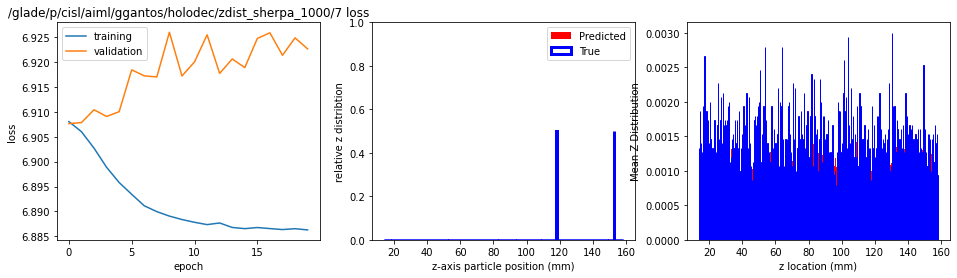

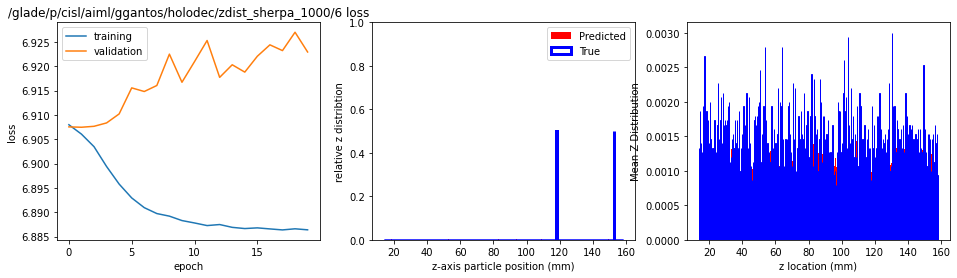

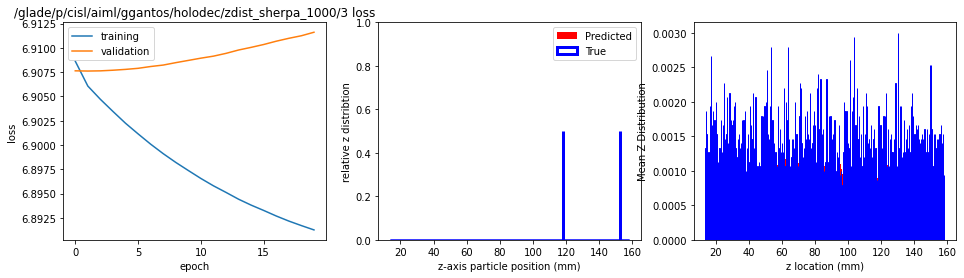

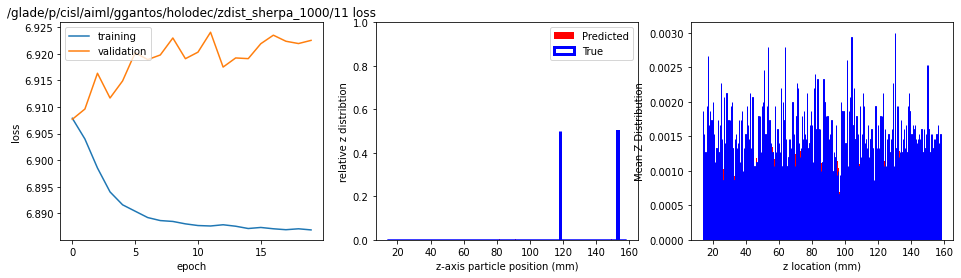

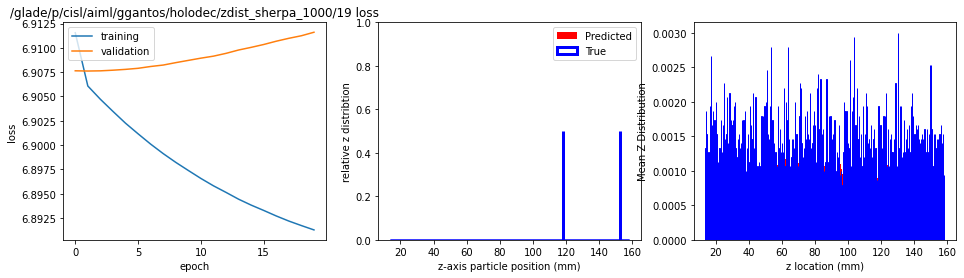

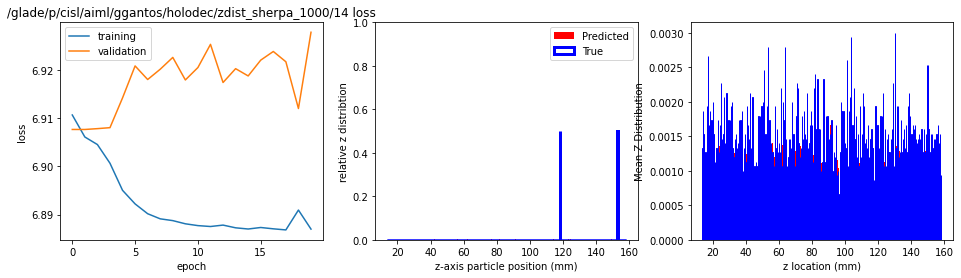

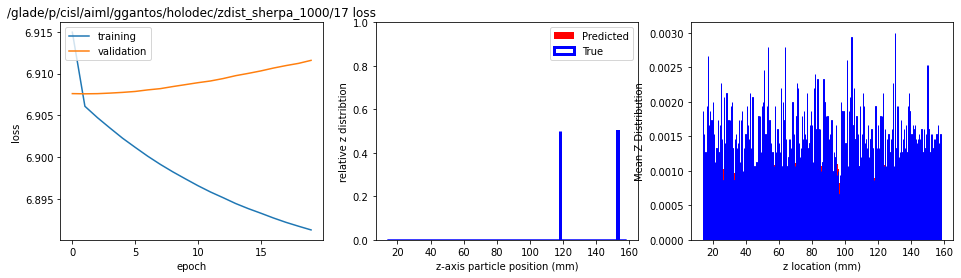

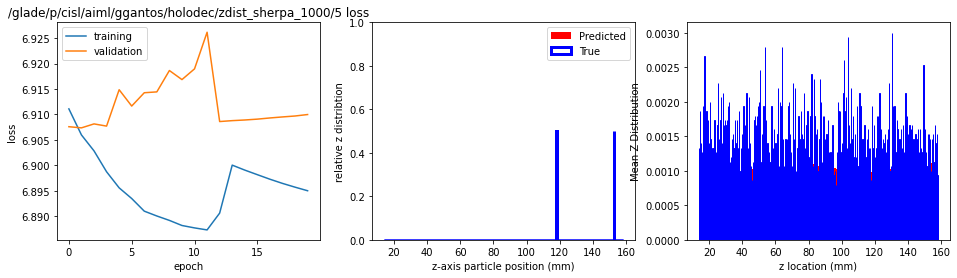

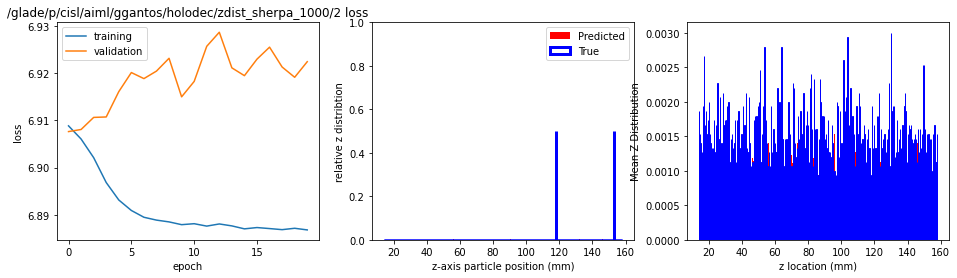

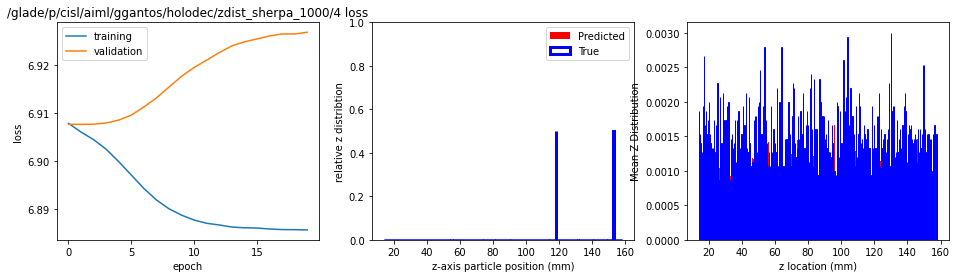

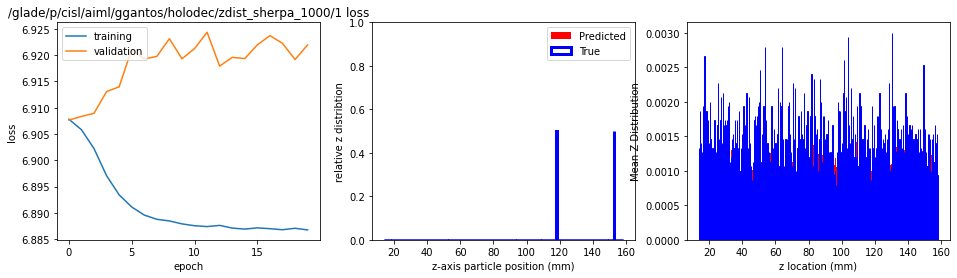

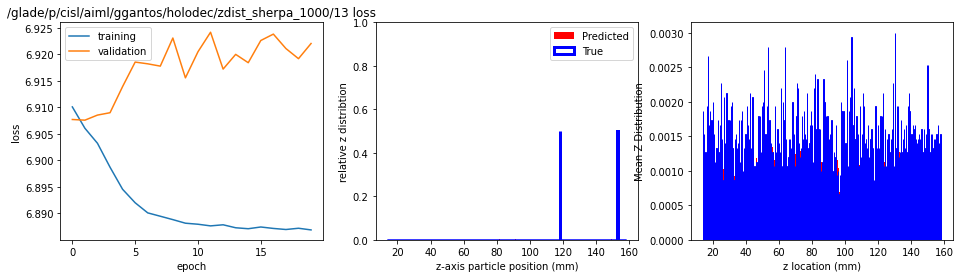

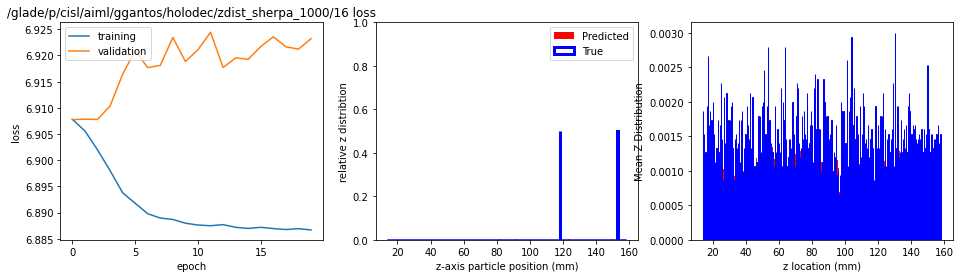

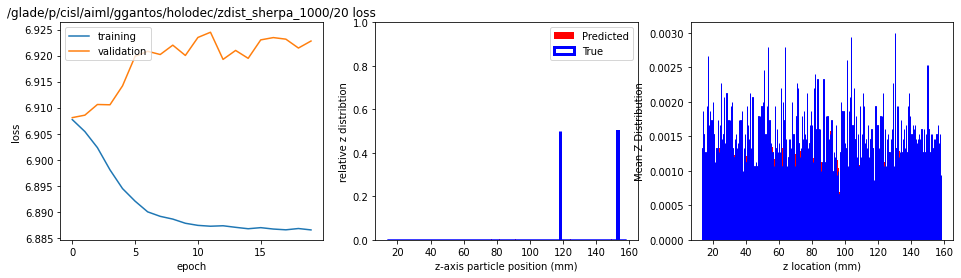

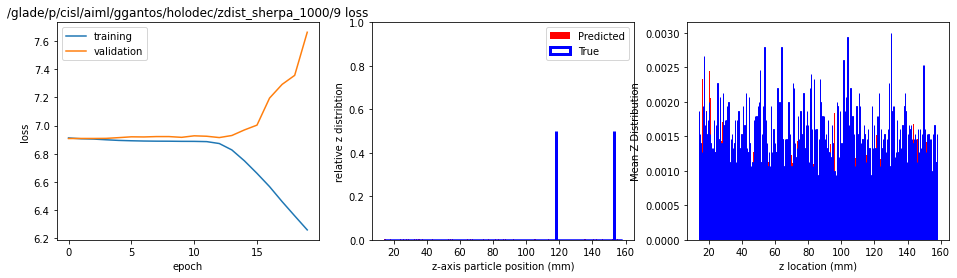

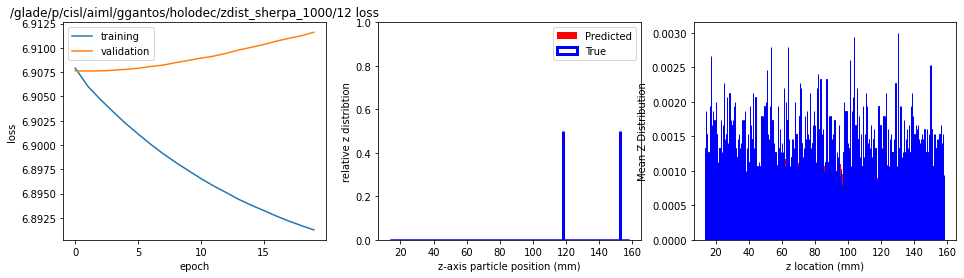

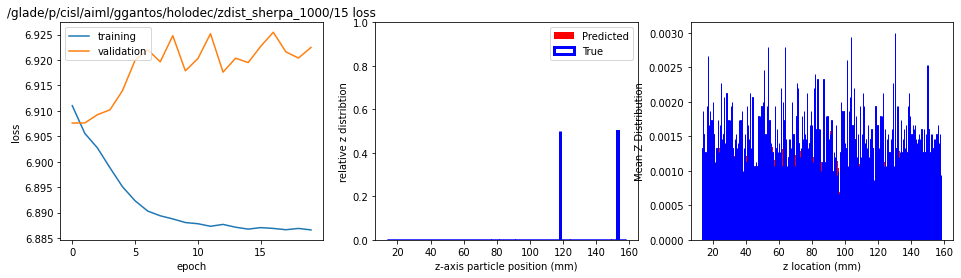

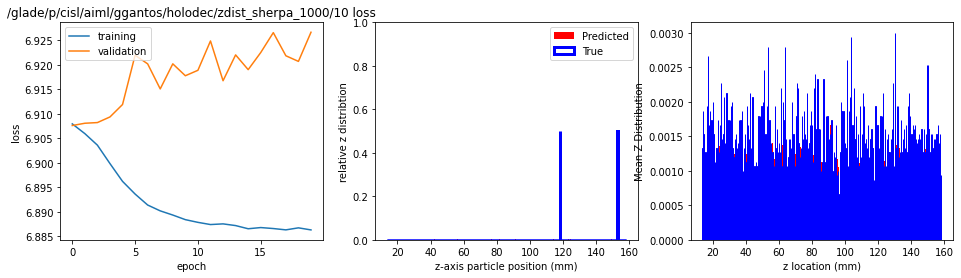

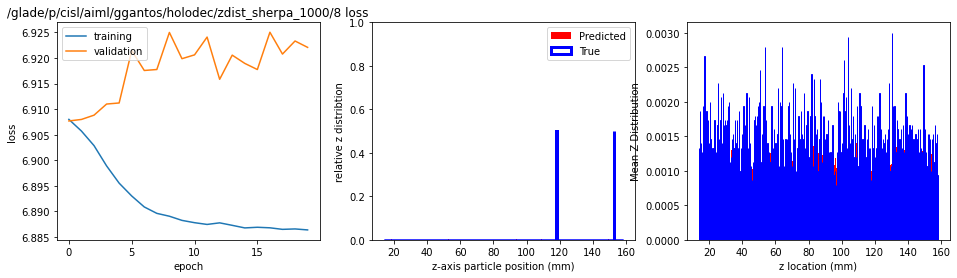

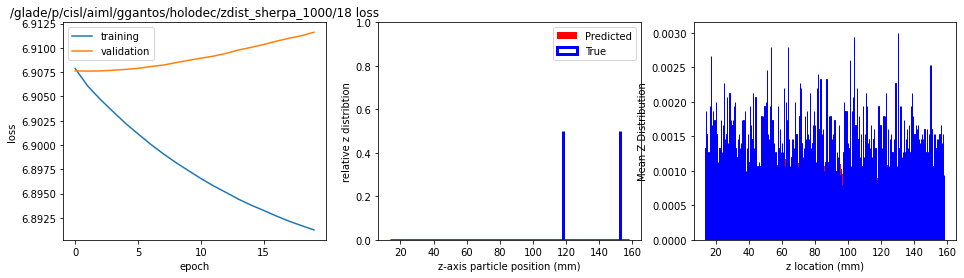

In [24]:
for model in models_1000:
    print(model)
    train_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "train_outputs_pred.csv"))
    valid_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "valid_outputs_pred.csv"))
    
    loss = np.genfromtxt(os.path.join(model_path, model, "loss.csv"))
    val_loss = np.genfromtxt(os.path.join(model_path, model, "val_loss.csv"))    

    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    axes[0].plot(loss)
    axes[0].plot(val_loss)
    axes[0].set_title(f'{model} loss')
    axes[0].set_ylabel('loss')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='upper left')
    
    axes[1].bar(z_bins_1000 / 1000, valid_outputs_pred[valid_index], bin_size_1000 / 1000, color='red', label="Predicted")
    axes[1].bar(z_bins_1000 / 1000, valid_outputs_1000[valid_index], bin_size_1000 / 1000, edgecolor='blue', facecolor="none", lw=3, label="True")
    axes[1].set_ylim(0, 1)
    axes[1].set_xlabel("z-axis particle position (mm)")
    axes[1].set_ylabel("relative z distribtion")
    axes[1].legend(loc="best")
    
    axes[2].bar(z_bins_1000 / 1000, valid_outputs_pred.mean(axis=0), (z_bins_1000[1] - z_bins_1000[0]) / 1000, color='red')
    axes[2].bar(z_bins_1000 / 1000, valid_outputs_1000.mean(axis=0), (z_bins_1000[1]-z_bins_1000[0]) / 1000, edgecolor='blue', facecolor="none", lw=1)
    axes[2].set_xlabel("z location (mm)")
    axes[2].set_ylabel("Mean Z Distribution")
    
    rps_nn = ranked_probability_score(valid_outputs_1000, valid_outputs_pred)
    rps_climo = ranked_probability_score(valid_outputs_1000, np.ones(valid_outputs_pred.shape) / valid_outputs_pred.shape[1])
    print(rps_nn, rps_climo)
    rpss = 1 - rps_nn / rps_climo
    print(f"RPSS: {rpss:0.3f}")